In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from tqdm import tqdm

import pickle

# this code is available on GitHub: github.com/BDNYC/Doublet_Quantifier
from doublet_quantifier.models import *
from doublet_quantifier.curvefit import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
from functions.data_tools import *
from functions.plotting_tools import *
# path to this directory
mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/'
sys.path.append(mypath)

In [2]:
# Loading pseudo-Voigt fit parameters for various temperatures
# various pickle files generated via fitting_sonora_models.ipynb
dfs = []

temps = [1200, 1300, 1400, 1500, 1600, 1700,
         1800, 1900, 2000, 2100, 2200, 2300, 2400]

for temp in temps:
    with open(mypath + "diamondback-data/pickle_files/parameters/t" + str(temp) + "_parameter_df.pkl", "rb") as f:
        df = pickle.load(f)
        df["temp"] = temp * np.ones(len(df))
        dfs.append(df[df['clouds'] != 10].copy(
            deep=False).reset_index(drop=True))

del df  # no longer needed as it is included in the list of dataframes


[T1200, T1300, T1400, T1500, T1600, T1700, T1800,
    T1900, T2000, T2100, T2200, T2300, T2400] = dfs

### Plots the FWHM and max depth at various constant as shown in the research note

In [3]:
all_temps = False
T = 2100  # change to the desired temperature

# to see a plot of all temperatures, uncomment the following line
all_temps = False

#### This is a focused plot of the FWHM and max depth against gravity and $f_{sed}$ 

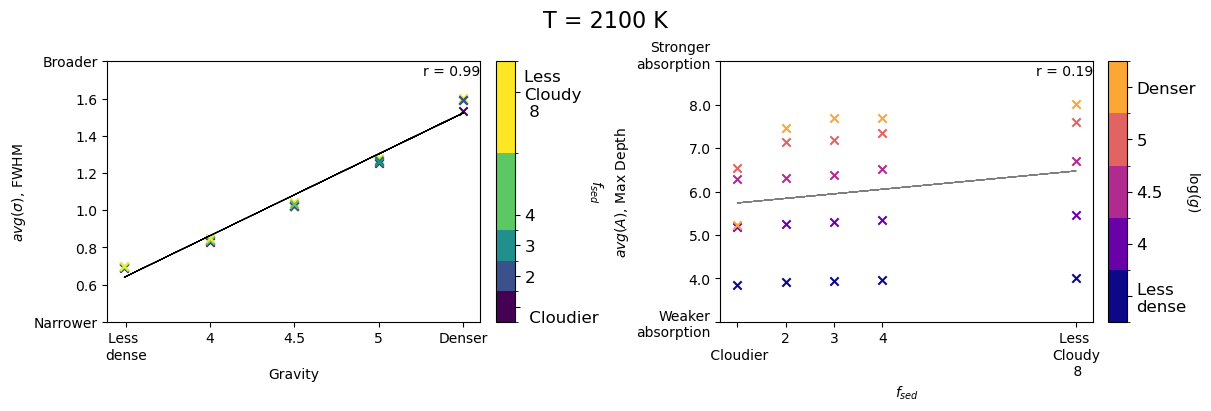

In [4]:
# plot the FWHM and max depth as shown in the research note for each temperature to see if the trends
for index in range(len(temps)):
    temp = temps[index]
    if all_temps or temp == T:
        focused_correlation_plot(dfs[index], title='T = '+str(temp) + ' K')

    else:
        pass

# note: r is the pearson correlation coefficient

#### This is a plot of the FWHM and max depth against all of the parameters

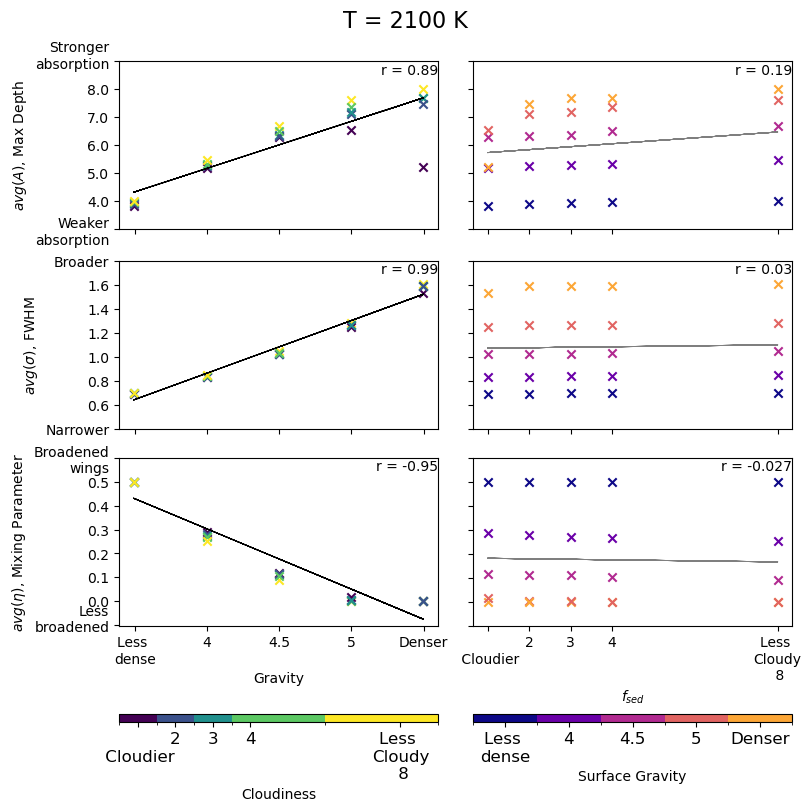

In [5]:
# plot all parameters for each temperature to see if there are any trends additional trends
# this plots all parameters to give a fuller picture of the data that the plots above
for index in range(len(temps)):
    temp = temps[index]
    if all_temps or temp == T:
        all_parameter_plot(dfs[index], title='T = '+str(temp) + ' K')
    else:
        pass